In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [5]:
df.drop(['Alley'],axis=1,inplace=True)

In [6]:
df.shape

(1460, 77)

In [7]:
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

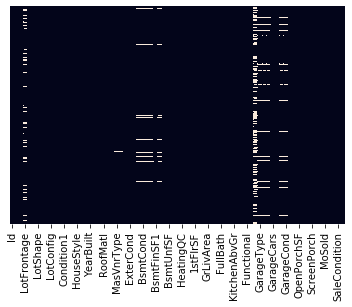

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [9]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [10]:
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

In [11]:
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])

In [12]:
df.drop(['GarageYrBlt'],axis=1,inplace=True)

In [13]:
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [14]:
df.shape

(1460, 76)

In [16]:
df.drop(['Id'],axis=1,inplace=True)


In [17]:
df.shape

(1460, 75)

In [15]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

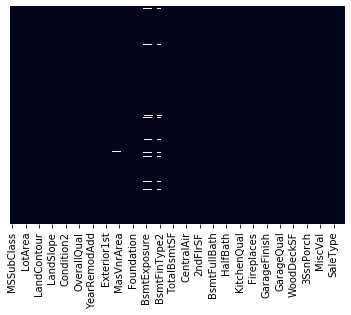

In [18]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [19]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

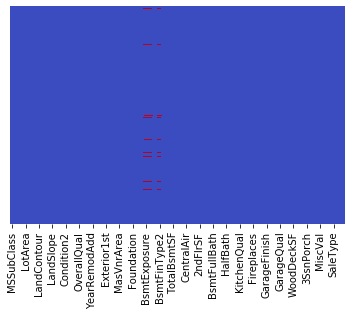

In [20]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [21]:
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

In [22]:
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df.dropna(inplace=True)

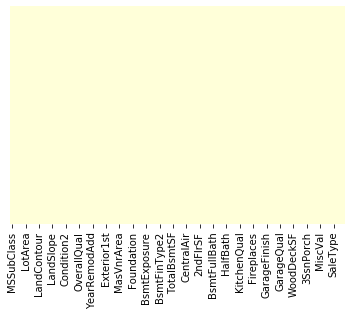

In [23]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [24]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [25]:
len(columns)

39

In [26]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [27]:
main_df = df.copy()

In [30]:
test_df = pd.read_csv('comptest1.csv')

In [31]:
test_df.shape

(1459, 74)

In [32]:
df.shape

(1422, 75)

In [69]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 76 columns):
Unnamed: 0       1459 non-null int64
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1459 non-null object
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non-

In [70]:
test_df.drop(['Unnamed: 0','Id'],axis=1,inplace=True)

In [88]:
final_df.info

<bound method DataFrame.info of       1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  BsmtFinSF2  \
0          856       854          0             3       706.0         0.0   
1         1262         0          0             3       978.0         0.0   
2          920       866          0             3       486.0         0.0   
3          961       756          0             3       216.0         0.0   
4         1145      1053          0             4       655.0         0.0   
...        ...       ...        ...           ...         ...         ...   
1454       546       546          0             3         0.0         0.0   
1455       546       546          0             3       252.0         0.0   
1456      1224         0          0             4      1224.0         0.0   
1457       970         0          0             3       337.0         0.0   
1458       996      1004          0             3       758.0         0.0   

      BsmtFullBath  BsmtHalfBath  BsmtUnfSF

In [33]:
df.shape

(1422, 75)

In [34]:
final_df=pd.concat([df,test_df],axis=0)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [35]:
final_df.shape

(2881, 75)

In [36]:
final_df=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [37]:
final_df.shape

(2881, 235)

In [38]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [39]:
final_df.shape

(2881, 175)

In [40]:
final_df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,1,1,0,0,0,0,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,1,1,0,0,0,0,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,1,1,0,0,0,0,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,1,0,0,0,0,1,0,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,1,1,0,0,0,0,1,0


In [41]:

df_Train=final_df.iloc[:1422,:]
df_Test=final_df.iloc[1422:,:]

In [51]:

df_Train.shape,df_Test.shape

((1422, 174), (1459, 174))

In [50]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

In [49]:
df_Test.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,896,0,0,2,468.0,144.0,0.0,0.0,270.0,0,...,0,0,1,1,0,0,0,0,0,0
1,1329,0,0,3,923.0,0.0,0.0,0.0,406.0,0,...,0,0,1,1,0,0,0,0,0,0
2,928,701,0,3,791.0,0.0,0.0,0.0,137.0,0,...,0,0,1,1,0,0,0,0,0,0
3,926,678,0,3,602.0,0.0,0.0,0.0,324.0,0,...,0,0,1,1,0,0,0,0,0,0
4,1280,0,0,2,263.0,0.0,0.0,0.0,1017.0,0,...,0,0,1,1,0,0,0,0,1,0


In [106]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

In [52]:
y

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1422, dtype: float64

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [54]:
forest = RandomForestRegressor(n_jobs=-1)

In [55]:
param_grid = [
{'n_estimators': [10, 25], 'max_features': [5, 10], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_forest = GridSearchCV(forest, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_forest.fit(df_Train, y)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_job

In [56]:
cvres = grid_search_forest.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

37284.25338678719 {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 10}
35777.09010115905 {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 25}
35611.61060896768 {'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'n_estimators': 10}
33377.56119808304 {'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'n_estimators': 25}
36681.59320493752 {'bootstrap': True, 'max_depth': 50, 'max_features': 5, 'n_estimators': 10}
34443.45675865332 {'bootstrap': True, 'max_depth': 50, 'max_features': 5, 'n_estimators': 25}
32929.34842330544 {'bootstrap': True, 'max_depth': 50, 'max_features': 10, 'n_estimators': 10}
33478.94219334084 {'bootstrap': True, 'max_depth': 50, 'max_features': 10, 'n_estimators': 25}
35859.19540691065 {'bootstrap': True, 'max_depth': None, 'max_features': 5, 'n_estimators': 10}
33796.87428095785 {'bootstrap': True, 'max_depth': None, 'max_features': 5, 'n_estimators': 25}
35138.15344928658 {'bootstrap': True, 'max_depth': N

In [57]:
grid_search_forest.best_estimator_

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=10, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=25, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [60]:
grid_best= grid_search_forest.best_estimator_.predict(df_Train)
errors = abs(grid_best - y)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y))
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('The best model from grid-search has an accuracy of', round(accuracy, 2),'%')

The best model from grid-search has an accuracy of 99.99 %


In [61]:
regressor = RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=10, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=25, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [62]:
regressor.fit(df_Train,y)

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=10, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=25, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [63]:
sub1 = pd.read_csv('sample_submission.csv')

In [64]:
sub1['SalePrice'] = regressor.predict(df_Test)

In [65]:
sub1.to_csv('sub1.csv',index = False)